In [18]:
import input_data 
import tensorflow as tf
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
tf.disable_control_flow_v2()
tf.compat.v1.disable_eager_execution()

In [19]:
tf.reset_default_graph()

Extracting minist/train-images-idx3-ubyte.gz
Extracting minist/train-labels-idx1-ubyte.gz
Extracting minist/t10k-images-idx3-ubyte.gz
Extracting minist/t10k-labels-idx1-ubyte.gz


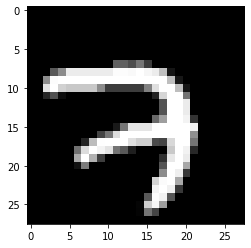

In [20]:
mnist = input_data.read_data_sets('minist/', one_hot=True)
plt.imshow(mnist.train.images[0].reshape(28,28), cmap='gray')

In [21]:
image1 = np.arange(0,784)#.reshape(28,28)
image1
#plt.imshow(image1, cmap='gray')

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

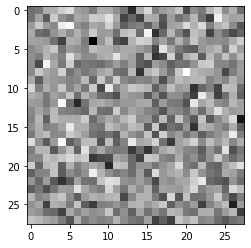

In [22]:
image2 = np.random.normal(size = 784).reshape(28,28)
plt.imshow(image2, cmap='gray')

In [23]:
noise_ph = tf.placeholder(tf.float32, [None, 100])

In [24]:
def generator(noise, reuse = tf.AUTO_REUSE):
    with tf.variable_scope('generator', reuse = reuse):
        # 100 -> 128 -> 128 -> 784
        hidden_layer1 = tf.nn.relu(tf.layers.dense(inputs = noise, units = 128))
        hidden_layer2 = tf.nn.relu(tf.layers.dense(inputs = hidden_layer1, units = 128))
        output_layer = tf.layers.dense(inputs = hidden_layer2, units = 784, activation = tf.nn.tanh)
        return output_layer

In [25]:
real_image_ph = tf.placeholder(tf.float32, [None, 784])

In [26]:
def screener(X, reuse = tf.AUTO_REUSE):
    with tf.variable_scope('screener', reuse = reuse):
        #784 -> 128 -> 128 -> 1    
        hidden_layer1 = tf.nn.relu(tf.layers.dense(inputs=X, units=128))
        hidden_layer2 = tf.nn.relu(tf.layers.dense(inputs=hidden_layer1, units=128))
        logits = tf.layers.dense(hidden_layer2, units=1)
        return logits

In [27]:
logits_image_real = screener(real_image_ph)
logits_image_noise = screener(generator(noise_ph), tf.AUTO_REUSE)
error_screener_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_image_real, 
                                                                             labels=tf.ones_like(logits_image_real)* (0.9)))
error_screener_noise = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_image_noise,
                                                                              labels=tf.zeros_like(logits_image_noise)))
error_screener = error_screener_real + error_screener_noise

error_generator = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_image_noise,
                                                                         labels=tf.ones_like(logits_image_noise)))

In [28]:
variables = tf.trainable_variables()
variables

[<tf.Variable 'screener/dense/kernel:0' shape=(784, 128) dtype=float32>,
 <tf.Variable 'screener/dense/bias:0' shape=(128,) dtype=float32>,
 <tf.Variable 'screener/dense_1/kernel:0' shape=(128, 128) dtype=float32>,
 <tf.Variable 'screener/dense_1/bias:0' shape=(128,) dtype=float32>,
 <tf.Variable 'screener/dense_2/kernel:0' shape=(128, 1) dtype=float32>,
 <tf.Variable 'screener/dense_2/bias:0' shape=(1,) dtype=float32>,
 <tf.Variable 'generator/dense/kernel:0' shape=(100, 128) dtype=float32>,
 <tf.Variable 'generator/dense/bias:0' shape=(128,) dtype=float32>,
 <tf.Variable 'generator/dense_1/kernel:0' shape=(128, 128) dtype=float32>,
 <tf.Variable 'generator/dense_1/bias:0' shape=(128,) dtype=float32>,
 <tf.Variable 'generator/dense_2/kernel:0' shape=(128, 784) dtype=float32>,
 <tf.Variable 'generator/dense_2/bias:0' shape=(784,) dtype=float32>]

In [29]:
variables_screener = [var for var in variables if 'screener' in var.name]
print([var.name for var in variables_screener])

['screener/dense/kernel:0', 'screener/dense/bias:0', 'screener/dense_1/kernel:0', 'screener/dense_1/bias:0', 'screener/dense_2/kernel:0', 'screener/dense_2/bias:0']


In [30]:
variables_generator = [var for var in variables if 'generator' in var.name]
print([var.name for var in variables_generator])

['generator/dense/kernel:0', 'generator/dense/bias:0', 'generator/dense_1/kernel:0', 'generator/dense_1/bias:0', 'generator/dense_2/kernel:0', 'generator/dense_2/bias:0']


In [31]:
train_screener = tf.train.AdamOptimizer(learning_rate=0.001).minimize(error_screener, var_list=variables_screener)
train_generator = tf.train.AdamOptimizer(learning_rate=0.001).minimize(error_generator, var_list=variables_generator)

In [44]:
batch_size = 100
sample_test = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epochs in range(1000):
        num_batches = mnist.train.num_examples // batch_size
        for i in range(num_batches):
            batch = mnist.train.next_batch(batch_size)
            image_batch = batch[0].reshape((100, 784))
            image_batch = image_batch * 2 - 1

            batch_noise = np.random.uniform(-1, 1, size=(batch_size, 100))
            _, cost_screener = sess.run([train_screener, error_screener], feed_dict={real_image_ph:image_batch, noise_ph:batch_noise })
            _, cost_generator = sess.run([train_generator, error_generator], feed_dict={noise_ph:batch_noise})

        print('epochs : ' + str(epochs+1) + ' error Scr : ' + str(cost_screener) + ' error Gen : ' + str(cost_generator))

        noise_test = np.random.uniform(-1, 1, size = (1,100))
        image_create = sess.run(generator(noise_ph, tf.AUTO_REUSE), feed_dict={noise_ph: noise_test})
        sample_test.append(image_create)

epochs : 1 error Scr : 0.55173385 error Gen : 5.5262322
epochs : 2 error Scr : 0.644098 error Gen : 3.2413244
epochs : 3 error Scr : 0.9691511 error Gen : 2.217753
epochs : 4 error Scr : 1.2149501 error Gen : 1.6138932
epochs : 5 error Scr : 4.8370185 error Gen : 2.3267598
epochs : 6 error Scr : 1.6667539 error Gen : 1.7241496
epochs : 7 error Scr : 1.6471595 error Gen : 1.5170691
epochs : 8 error Scr : 1.2388356 error Gen : 2.5165553
epochs : 9 error Scr : 0.795529 error Gen : 4.990269
epochs : 10 error Scr : 2.0564268 error Gen : 0.8601091
epochs : 11 error Scr : 1.141106 error Gen : 1.248841
epochs : 12 error Scr : 2.7306614 error Gen : 2.5555222
epochs : 13 error Scr : 1.9122458 error Gen : 3.351458
epochs : 14 error Scr : 0.8972361 error Gen : 3.7616231
epochs : 15 error Scr : 1.5739615 error Gen : 3.5622299
epochs : 16 error Scr : 1.7820821 error Gen : 1.4927678
epochs : 17 error Scr : 1.4336243 error Gen : 1.9013207
epochs : 18 error Scr : 0.6863416 error Gen : 1.9446493
epochs 

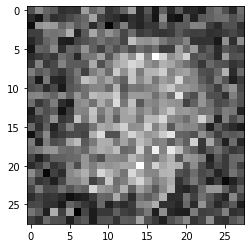

In [34]:
plt.imshow(sample_test[0].reshape(28,28), cmap='gray')

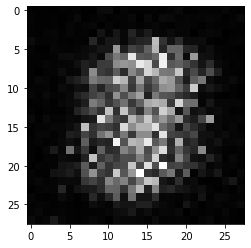

In [36]:
plt.imshow(sample_test[10].reshape(28,28), cmap='gray')

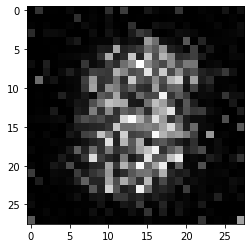

In [37]:
plt.imshow(sample_test[30].reshape(28,28), cmap='gray')

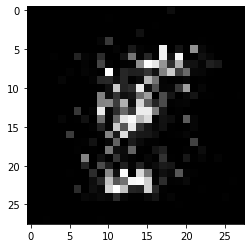

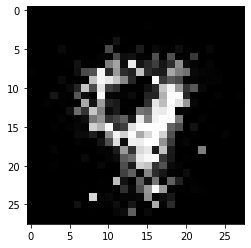

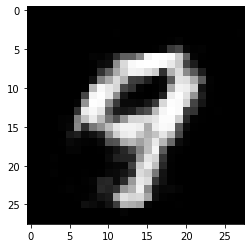